In [1]:
# the usual header
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
# do plots in notebook instead of in a new window
%matplotlib inline
plt.rcParams['axes.linewidth'] = 0.7
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['text.usetex'] = True
#plt.rcParams['text.latex.preamble'] = '\usepackage{lmodern}'
inches_per_pt = 1.0/72.27
golden_ratio = (np.sqrt(5)-1)/2
width = 246.0*inches_per_pt

Input

In [2]:
dir = "/archive/schrauth/corr/"

avd = np.loadtxt(dir+"corr1st_VD_4e6.dat");      bvd = np.loadtxt(dir+"corr2nd_VD_4e6.dat")
acc3  = np.loadtxt(dir+"corr1st_kLN3_4e6.dat");  bcc3 = np.loadtxt(dir+"corr2nd_kLN3_4e6.dat") 
acc4  = np.loadtxt(dir+"corr1st_kLN4_4e6.dat");  bcc4 = np.loadtxt(dir+"corr2nd_kLN4_4e6.dat") 
acc6  = np.loadtxt(dir+"corr1st_kLN6_4e6.dat");  bcc6 = np.loadtxt(dir+"corr2nd_kLN6_4e6.dat") 
acc10 = np.loadtxt(dir+"corr1st_kLN10_4e6.dat"); bcc10 = np.loadtxt(dir+"corr2nd_kLN10_4e6.dat") 
acc25 = np.loadtxt(dir+"corr1st_kLN25_2e6.dat"); bcc25 = np.loadtxt(dir+"corr2nd_kLN25_2e6.dat") 
argg  = np.loadtxt(dir+"corr1st_RGG_5e6.dat");   brgg = np.loadtxt(dir+"corr2nd_RGG_5e6.dat") 
agg   = np.loadtxt(dir+"corr1st_GG_5e5.dat");    bgg = np.loadtxt(dir+"corr2nd_GG_5e5.dat") 
arng  = np.loadtxt(dir+"corr1st_RNG_5e5.dat");   brng = np.loadtxt(dir+"corr2nd_RNG_5e5.dat") 
asqnn = np.loadtxt(dir+"corr1st_sqNN_5e5.dat");  bsqnn = np.loadtxt(dir+"corr2nd_sqNN_5e5.dat") 
aqnn = np.loadtxt("/archive/schrauth/xyq/test/corr1st.dat")

Coarsening

In [3]:
coarsening_factor = 100

# coarsening done by reshaping and then averaging
aavd   = np.mean(avd.reshape(-1,   coarsening_factor), axis=1)
aacc4  = np.mean(acc4.reshape(-1,  coarsening_factor), axis=1)
aacc6  = np.mean(acc6.reshape(-1,  coarsening_factor), axis=1)
aacc10 = np.mean(acc10.reshape(-1, coarsening_factor), axis=1)
aagg   = np.mean(agg.reshape(-1,   coarsening_factor), axis=1)
aarng  = np.mean(arng.reshape(-1,  coarsening_factor), axis=1)
aargg  = np.mean(argg.reshape(-1,  coarsening_factor), axis=1)
aasqnn = np.mean(asqnn.reshape(-1, coarsening_factor), axis=1)
aaqnn  = np.mean(aqnn.reshape(-1, coarsening_factor), axis=1)


bbvd   = np.mean(bvd.reshape(-1,   coarsening_factor), axis=1)
bbcc4  = np.mean(bcc4.reshape(-1,  coarsening_factor), axis=1)
bbcc6  = np.mean(bcc6.reshape(-1,  coarsening_factor), axis=1)
bbcc10 = np.mean(bcc10.reshape(-1, coarsening_factor), axis=1)
bbgg   = np.mean(bgg.reshape(-1,   coarsening_factor), axis=1)
bbrng  = np.mean(brng.reshape(-1,  coarsening_factor), axis=1)
bbrgg  = np.mean(brgg.reshape(-1,  coarsening_factor), axis=1)
bbsqnn = np.mean(bsqnn.reshape(-1, coarsening_factor), axis=1)

xx = np.arange(len(bbvd)) / 100000 * coarsening_factor

Plot

/home/schrauth/.anaconda/lib/python3.5/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/home/schrauth/.anaconda/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


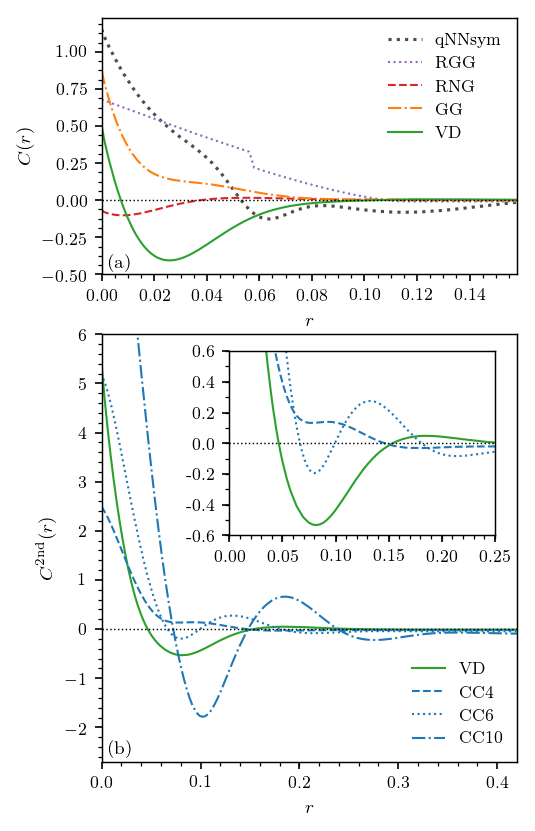

In [21]:
from matplotlib import gridspec
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
lw=1

#           blue       orange     green       red       purple     brown       grey    light blue
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#7f7f7f", "#17becf"]

xmajorLocator   = MultipleLocator(0.05)
xmajorFormatter = FormatStrFormatter('%.2f')
xminorLocator   = MultipleLocator(0.01)
ymajorLocator   = MultipleLocator(0.2)
ymajorFormatter = FormatStrFormatter('%.1f')
yminorLocator   = MultipleLocator(0.1)

fig = plt.figure(figsize=(width, 1.57*width), dpi=150) 
gs = gridspec.GridSpec(2, 1, height_ratios=[3,5]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.plot(xx, aasqnn,   lw=1.5*lw, c=colors[5], label=r"qNNsym", linestyle="dotted",  color="0.3")
ax1.plot(xx, aargg/10, lw=lw, c=colors[3], label=r"RGG",    linestyle="dotted",  color=colors[4])
ax1.plot(xx, aarng,    lw=lw, c=colors[4], label=r"RNG",    linestyle="--",  color=colors[3])
ax1.plot(xx, aagg,     lw=lw, c=colors[1], label=r"GG",     linestyle="-.",  color=colors[1])
ax1.plot(xx, aavd,     lw=lw, c=colors[2], label=r"VD",     linestyle="default", color=colors[2])

#ax1.plot(xx, 0.5*aaqnn,   lw=lw, c=colors[0], label=r"qNN")

ax1.axhline(0, c="k", lw=0.7, linestyle="dotted", zorder=6)
ax1.legend(loc="upper right", frameon=False)


ax2.plot(xx, bbvd,   lw=lw, c=colors[2], label=r"VD")
ax2.plot(xx, bbcc4,  lw=lw, c=colors[0], linestyle="dashed", label=r"CC4")
ax2.plot(xx, bbcc6,  lw=lw, c=colors[0], linestyle="dotted",    label=r"CC6")
ax2.plot(xx, bbcc10, lw=lw, c=colors[0], linestyle="-.", label=r"CC10")

left, bottom, inwidth, inheight = [0.43, 0.35, 0.52, 0.23]
ax3 = fig.add_axes([left, bottom, inwidth, inheight])
ax3.plot(xx, bbvd,  lw=lw, c=colors[2], label=r"VD")
ax3.plot(xx, bbcc4, lw=lw, c=colors[0], linestyle="dashed", label=r"CC4")
ax3.plot(xx, bbcc6, lw=lw, c=colors[0], linestyle="dotted",     label=r"CC6")

ax1.minorticks_on()
ax2.minorticks_on()

ax1.set_xlim(0.0, 0.158)
ax1.set_ylim(-0.5, 1.23)
ax3.set_xlim(0.0, 0.25)
ax3.set_ylim(-0.6, 0.6)
ax2.set_xlim(0.0, 0.42)
ax2.set_ylim(-2.7,6)
ax3.yaxis.set_major_locator(ymajorLocator)
ax3.yaxis.set_major_formatter(ymajorFormatter)
ax3.yaxis.set_minor_locator(yminorLocator)
ax3.xaxis.set_major_locator(xmajorLocator)
ax3.xaxis.set_major_formatter(xmajorFormatter)
ax3.xaxis.set_minor_locator(xminorLocator)

ax2.axhline(0, c="k", lw=0.7,  linestyle="dotted", zorder=4)
ax3.axhline(0, c="k", lw=0.7,  linestyle="dotted", zorder=2)
ax2.legend(loc="lower right", frameon=False)
ax2.set_xlabel(r"$r$")
ax2.set_ylabel(r"$C^\mathrm{2nd}(r)$")
ax1.set_xlabel(r"$r$")
ax1.set_ylabel(r"$C(r)$")

ax1.text(0.015, 0.01,'(a)', horizontalalignment='left', verticalalignment='bottom', transform=ax1.transAxes)
ax2.text(0.015, 0.01,'(b)', horizontalalignment='left', verticalalignment='bottom', transform=ax2.transAxes)

plt.tight_layout(pad=0)
fig.subplots_adjust(left=0.18)
plt.savefig("/home/schrauth/work/paper-ising-quenched/fig/corr_dual.pdf")

In [ ]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

xmajorLocator   = MultipleLocator(0.05)
xmajorFormatter = FormatStrFormatter('%.2f')
xminorLocator   = MultipleLocator(0.01)
ymajorLocator   = MultipleLocator(0.2)
ymajorFormatter = FormatStrFormatter('%.1f')
yminorLocator   = MultipleLocator(0.1)

fig, ax1 = plt.subplots(figsize=(width,width), dpi=200)

ax1.plot(xx, bbvd,   lw=lw, label=r"VD")
ax1.plot(xx, bbcc4,  lw=lw, label=r"CC4")
ax1.plot(xx, bbcc6,  lw=lw, label=r"CC6")
ax1.plot(xx, bbcc10, lw=lw, label=r"CC10")

left, bottom, inwidth, inheight = [0.45, 0.60, 0.45, 0.3]
ax2 = fig.add_axes([left, bottom, inwidth, inheight])
ax2.plot(xx, bbvd,  lw=lw, label=r"VD")
ax2.plot(xx, bbcc4, lw=lw, label=r"CC4")
ax2.plot(xx, bbcc6, lw=lw, label=r"CC6")

ax2.set_xlim(0.0, 0.25)
ax2.set_ylim(-0.6, 0.6)

ax1.set_xlim(0.0, 0.42)
ax1.set_ylim(-2.7,6)

ax2.yaxis.set_major_locator(ymajorLocator)
ax2.yaxis.set_major_formatter(ymajorFormatter)
ax2.yaxis.set_minor_locator(yminorLocator)

ax2.xaxis.set_major_locator(xmajorLocator)
ax2.xaxis.set_major_formatter(xmajorFormatter)
ax2.xaxis.set_minor_locator(xminorLocator)

ax1.axhline(0, c="k", lw=0.7, zorder=2)
ax2.axhline(0, c="k", lw=0.7, zorder=2)
ax1.legend(loc="lower right", frameon=False)
ax1.set_xlabel(r"$r$")
ax1.set_ylabel(r"$C^\mathrm{2nd}(r)$")
plt.tight_layout()
plt.savefig("/home/schrauth/work/paper-ising-quenched/fig/C_2nd_full.pdf")

First-layer

In [ ]:
dir = "/archive/schrauth/xyq/xyq_site_diluted//"

asd = np.loadtxt(dir+"corr1st.dat");       
bsd = np.loadtxt(dir+"corr2nd.dat")
aasd = np.mean(asd.reshape(-1, coarsening_factor), axis=1)
bbsd = np.mean(bsd.reshape(-1, coarsening_factor), axis=1)
# for site diluted regular lattice there are only discrete values of r
# therefore most values in the arrays are NaNs and we need indices
ind = ~np.isnan(asd)
xxsd = np.arange(len(asd)) / 100000

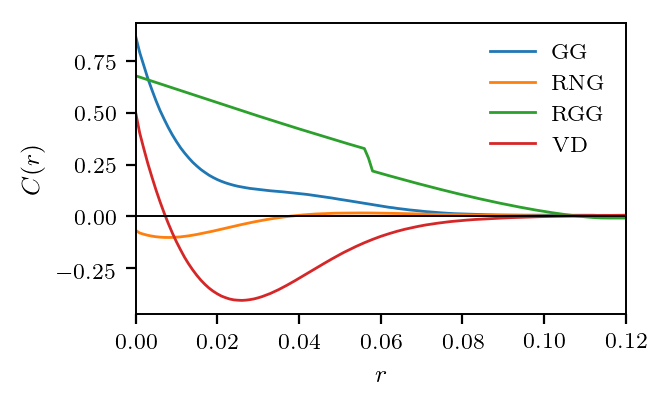

In [8]:
plt.figure(figsize=(width,width*golden_ratio), dpi=200)
#plt.plot(xxsd[ind], asd[ind], ".", lw=lw, label=r"SD")
plt.plot(xx, aagg, lw=lw, label=r"GG")
plt.plot(xx, aarng, lw=lw, label=r"RNG")
plt.plot(xx, aargg/10, lw=lw, label=r"RGG")
plt.plot(xx, aavd, lw=lw, label=r"VD")

plt.xlim(0.0, 0.12)

plt.axhline(0, c="k", lw=0.7, zorder=2)
plt.legend(loc="upper right", frameon=False)
#plt.title(r"$q$-fluctuation correlation function ")
plt.xlabel(r"$r$")
plt.ylabel(r"$C(r)$")
plt.tight_layout()
plt.savefig("/home/schrauth/work/paper-ising-quenched/fig/Corr.pdf")

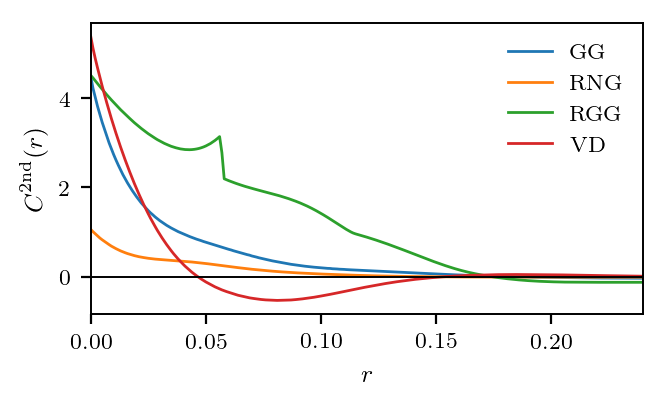

In [57]:
plt.figure(figsize=(width,width*golden_ratio), dpi=200)
plt.plot(xx, bbgg,  lw=lw, label=r"GG")
plt.plot(xx, bbrng, lw=lw, label=r"RNG")
plt.plot(xx, bbrgg/3, lw=lw, label=r"RGG")
plt.plot(xx, bbvd,  lw=lw, label=r"VD")
#plt.plot(xxsd[ind], bsd[ind], ".", markersize=2, lw=lw, label=r"Site Dil.")

plt.xlim(0.0, 0.24)

plt.axhline(0, c="k", lw=0.7, zorder=2)
plt.legend(loc="upper right", frameon=False)
#plt.title(r"$q_\mathrm{2nd}$-fluctuation correlation function ")
plt.xlabel(r"$r$")
plt.ylabel(r"$C^\mathrm{2nd}(r)$")
plt.tight_layout()